# EDA & Modelling

## Package loading

In [1]:
from EZS_func import *
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import math
from pandas.api.types import is_numeric_dtype
from itertools import product
from scipy import stats
from sklearn import set_config
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.inspection import permutation_importance
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import LocalOutlierFactor
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from yellowbrick.model_selection import learning_curve
from yellowbrick.model_selection import feature_importances
from yellowbrick.features import rank1d
from yellowbrick.features import rank2d
from yellowbrick.regressor import prediction_error
from yellowbrick.regressor import residuals_plot
from yellowbrick.contrib.missing import MissingValuesBar
from yellowbrick.contrib.missing import MissingValuesDispersion
from yellowbrick.target.feature_correlation import feature_correlation
from polylearn import PolynomialNetworkRegressor
from polylearn import FactorizationMachineRegressor


## Exploratory Data Analysis 

### File and parameters loading

In [2]:
problem_type = 'regression'

In [3]:
stacking = 'True'

In [4]:
data_size = 'small'

In [5]:
df = pd.read_csv('/home/philippe/Documents/python project/EZStacking-v0.6/dataset/fmri.csv')

In [6]:
target_col = 'signal'

In [7]:
user_drop_cols = []

In [8]:
threshold_NaN = 0.5

In [9]:
threshold_cat = 3

In [10]:
threshold_Z = 3.0

#### Dataset copy

In [11]:
df_copy = df.copy()

### Dataset Information

In [12]:
df.shape

(1064, 5)

#### Some records

In [13]:
display(df)

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


#### Dataframe structure

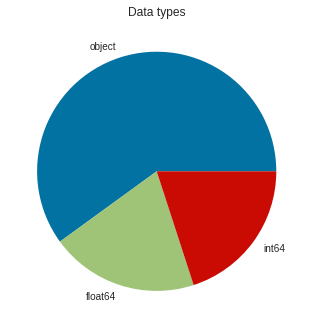

In [14]:
plot_dataframe_structure(df)

#### Dataframe statistics

In [15]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
timepoint,1064.0,9.00000,5.479801,0.000000,4.00000,9.000000,14.000000,18.000000
signal,1064.0,0.00354,0.093930,-0.255486,-0.04607,-0.013653,0.024293,0.564985


#### Which columns could be categorical ?

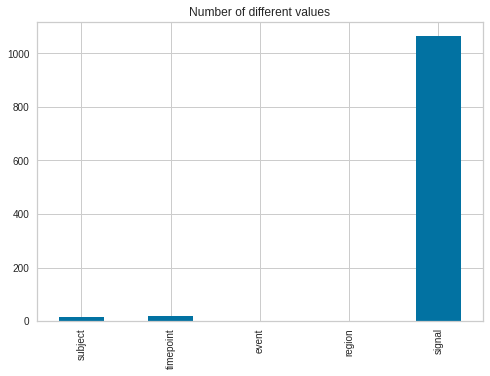

In [16]:
plot_categorical(df)

### Dataset Cleaning

#### Duplicate rows:

In [17]:
duplicates(df)

No duplicate rows.


,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


#### Drop user's columns:

In [18]:
print('user_drop_cols = ', user_drop_cols)

user_drop_cols =  []


In [19]:
df = df.drop(user_drop_cols, axis=1)

#### Drop NaN:

In [20]:
df, drop_cols = drop_na(df, threshold_NaN)

No need to drop columns.


Final set of dropped columns

In [21]:
dropped_cols = np.unique(np.concatenate((drop_cols, user_drop_cols)))

In [22]:
display(dropped_cols)

array([], dtype=float64)

#### Encoding data:

In [23]:
df, encoded_cols = encoding(df, threshold_cat)

Encoding object column: subject
Encoding numeric column: timepoint
Encoding object column: event
Encoding object column: region
Encoding numeric column: signal


#### Imputing NaN using IterativeImputer

No handles with labels found to put in legend.


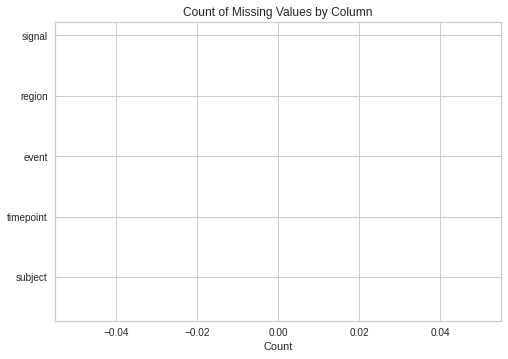

In [24]:
visualizer = MissingValuesBar(features=df.select_dtypes(include=np.number).columns.tolist())
visualizer.fit(df.select_dtypes(include=np.number))
visualizer.show();

##### Imputation

In [25]:
df = imputation(df)

No need to impute data.


#### Data compression:

In [26]:
df = downcast_dtypes(df)

Memory usage of dataframe is 0.04MB
Memory usage after optimization is: 0.01MB
Decreased by 82.3%


##### Dataframe structure after compression

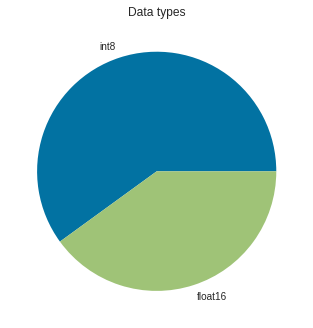

In [27]:
plot_dataframe_structure(df)

#### Outliers:

In [28]:
df = outliers(df, threshold_Z)

Using Z_score,  24  rows will be suppressed.


#### Splitting dataframe in features and targets

In [29]:
y = df[target_col]

In [30]:
X = df.drop(target_col, axis=1)

### Plottings

#### Ranking 

##### Ranking 1D 

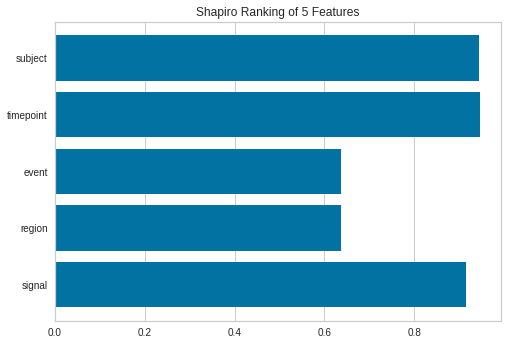

In [31]:
rank1d(df);

##### Ranking 2D 

###### Ranking 2D according to Pearson

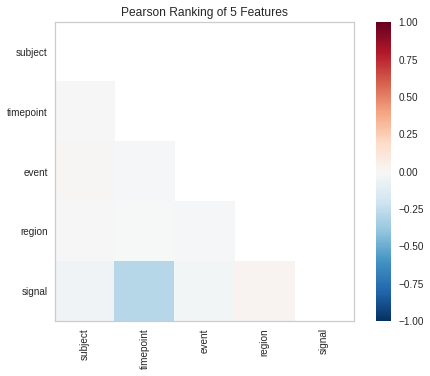

In [32]:
rank2d(df, algorithm='pearson');

###### Ranking 2D based on covariance

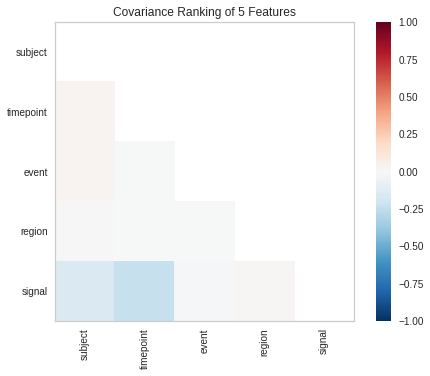

In [33]:
rank2d(df, algorithm='covariance');

###### Ranking 2D according to Spearman

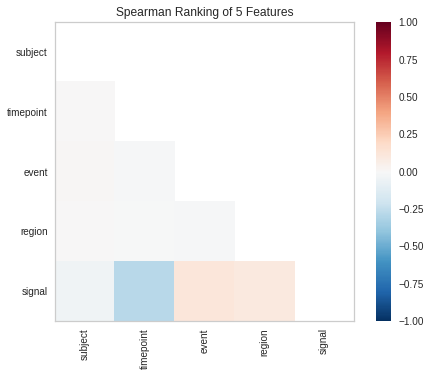

In [34]:
rank2d(df, algorithm='spearman');

###### Ranking 2D according to Kendalltau

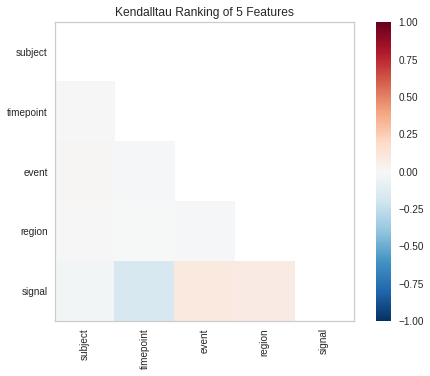

In [35]:
rank2d(df, algorithm='kendalltau');

#### Correlation

##### Correlation with Yellow Bricks

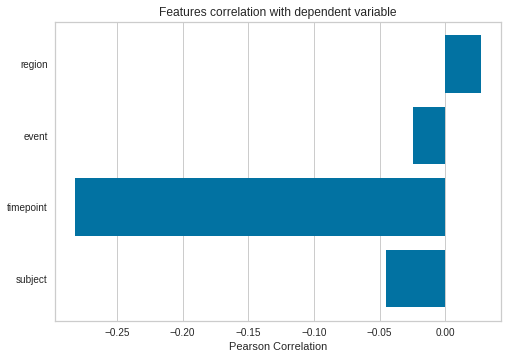

In [36]:
feature_correlation(X, y);

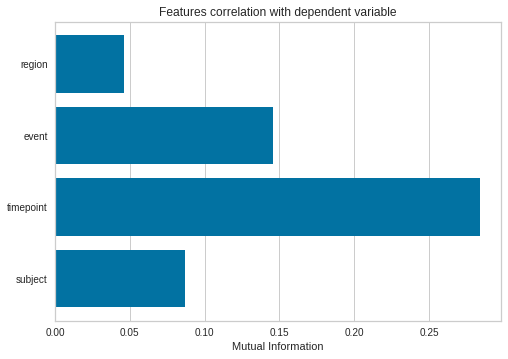

In [37]:
feature_correlation(X, y, method='mutual_info-regression');

#### Feature importance (a priori)

##### According to decision tree

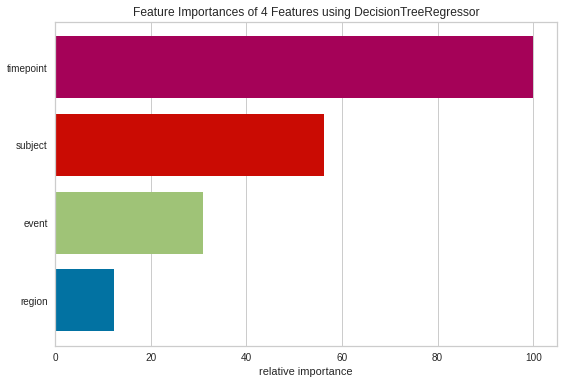

In [38]:
feature_importances(DecisionTreeRegressor(), X, y);

##### According to elasticnet regression

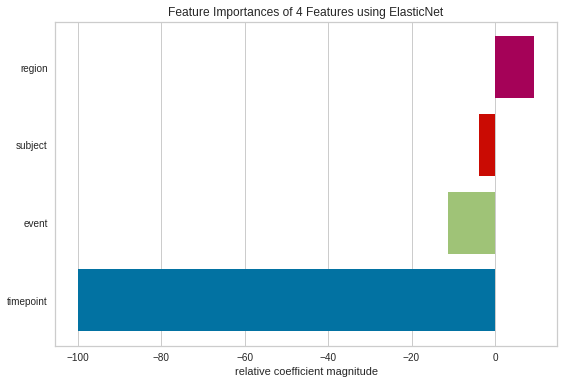

In [39]:
feature_importances(ElasticNet(alpha=0.01, l1_ratio=0.5), X, y);

## Splitting data in train and test sets 

In [40]:
df = df_copy

#### Splitting dataframe in features and targets

In [41]:
y = df[target_col]

In [42]:
X = df.drop(target_col, axis=1)

In [43]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.33)

## Modelling

### Model building

#### Pipeline building

##### Select the categorical and numerical columns

In [44]:
cat_selector = make_column_selector(dtype_include=object)

In [45]:
num_selector = make_column_selector(dtype_include=np.number)

##### For models based on tree

In [46]:
cat_tree_processor = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [47]:
num_tree_processor = SimpleImputer(strategy='mean', add_indicator=True)

In [48]:
tree_preprocessor = make_column_transformer((num_tree_processor, num_selector), (cat_tree_processor, cat_selector))

##### For models not based on tree

In [49]:
cat_ntree_processor = OneHotEncoder(handle_unknown='ignore')

In [50]:
num_ntree_processor = make_pipeline(StandardScaler(), SimpleImputer(strategy='mean', add_indicator=True))

In [51]:
ntree_preprocessor = make_column_transformer((num_ntree_processor, num_selector), (cat_ntree_processor, cat_selector))

##### Level-0 models

In [52]:
level_0 = [ 
          ('GPR', make_pipeline(ntree_preprocessor, GaussianProcessRegressor())), 
          ('DTR', make_pipeline(tree_preprocessor, DecisionTreeRegressor(max_depth=5))), 
          ('RFR', make_pipeline(tree_preprocessor, RandomForestRegressor(max_depth=5, n_estimators=10, max_features='auto'))), 
          ('ABR', make_pipeline(tree_preprocessor, AdaBoostRegressor())), 
          ('ELNE', make_pipeline(ntree_preprocessor, ElasticNet(alpha=0.01, l1_ratio=0.5))), 
          ('LINR', make_pipeline(ntree_preprocessor, LinearRegression())), 
          ('MLPR', make_pipeline(ntree_preprocessor, MLPRegressor(alpha=1, max_iter=1000, early_stopping=True))), 
          ('KNR', make_pipeline(ntree_preprocessor, KNeighborsRegressor())), 
          ('PNR', make_pipeline(ntree_preprocessor, PolynomialNetworkRegressor())), 
          ('FMR', make_pipeline(ntree_preprocessor, FactorizationMachineRegressor())), 
          ]

##### Level-1 model

In [53]:
level_1 = MLPRegressor()

##### Stacking for regression

In [54]:
model = StackingRegressor(level_0, final_estimator=level_1)

### Model fitting

In [55]:
%%time
set_config(display='diagram') 
model.fit(X_train, y_train)

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

### Model evaluation

#### Model scoring

In [56]:
score_stacking_r(model, X_train, y_train, X_test, y_test)

AttributeError: 'StackingRegressor' object has no attribute 'estimators_'

#### Feature permutation importance (a posteriori)

In [ ]:
plot_perm_imp(model, X, y, scoring = 'r2');

#### Residuals plot

In [ ]:
residuals_plot(model, X_train, y_train, X_test, y_test);

#### Prediction error

In [ ]:
prediction_error(model, X_train, y_train, X_test, y_test);